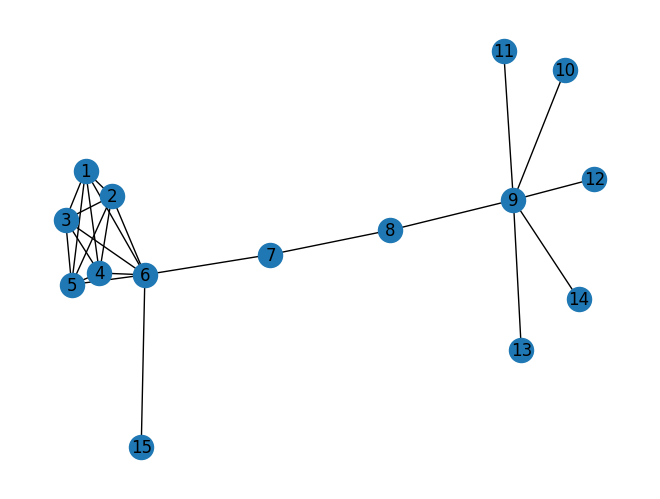

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

G = nx.complete_graph(range(1,7))
G.add_edges_from([(6, 7), (7, 8), (8, 9), (9, 10), (9, 11), (9, 12), (9, 13), (9, 14), (6, 15)])
nodelist = list(G.nodes())

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

## **A)** Compute the Katz centrality, with $β = 0.15$ and uniform intrinsic centrality $µ$ . You can implement the computation in Matlab, Python or whatever language you prefer.

In [2]:
import numpy as np

W = nx.adjacency_matrix(G)
W = W.toarray()

w,v = np.linalg.eig(W)
w = w.real
lambda_max = max(w) 

degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

N = G.number_of_nodes()
beta = 0.15
mu = np.ones((N,1))/N

In [3]:
W_df = pd.DataFrame(W)

print(W_df.to_string(max_cols=15, float_format="{:0.2f}".format))

    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14
0    0   1   1   1   1   1   0   0   0   0   0   0   0   0   0
1    1   0   1   1   1   1   0   0   0   0   0   0   0   0   0
2    1   1   0   1   1   1   0   0   0   0   0   0   0   0   0
3    1   1   1   0   1   1   0   0   0   0   0   0   0   0   0
4    1   1   1   1   0   1   0   0   0   0   0   0   0   0   0
5    1   1   1   1   1   0   1   0   0   0   0   0   0   0   1
6    0   0   0   0   0   1   0   1   0   0   0   0   0   0   0
7    0   0   0   0   0   0   1   0   1   0   0   0   0   0   0
8    0   0   0   0   0   0   0   1   0   1   1   1   1   1   0
9    0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
10   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
11   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
12   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
13   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
14   0   0   0   0   0   1   0   0   0   0   0   0   0 

In [4]:
P_df = pd.DataFrame(P)

# Force printing all columns in one line
print(P_df.to_string(max_cols=15, float_format="{:0.2f}".format))

     0    1    2    3    4    5    6    7    8    9    10   11   12   13   14
0  0.00 0.20 0.20 0.20 0.20 0.20 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
1  0.20 0.00 0.20 0.20 0.20 0.20 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
2  0.20 0.20 0.00 0.20 0.20 0.20 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
3  0.20 0.20 0.20 0.00 0.20 0.20 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
4  0.20 0.20 0.20 0.20 0.00 0.20 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
5  0.14 0.14 0.14 0.14 0.14 0.00 0.14 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.14
6  0.00 0.00 0.00 0.00 0.00 0.50 0.00 0.50 0.00 0.00 0.00 0.00 0.00 0.00 0.00
7  0.00 0.00 0.00 0.00 0.00 0.00 0.50 0.00 0.50 0.00 0.00 0.00 0.00 0.00 0.00
8  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.17 0.00 0.17 0.17 0.17 0.17 0.17 0.00
9  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00
10 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00
11 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0

Katz centrality: 
 [[0.11813757]
 [0.11813757]
 [0.11813757]
 [0.11813757]
 [0.11813757]
 [0.13007854]
 [0.04424685]
 [0.03172152]
 [0.04281285]
 [0.02430452]
 [0.02430452]
 [0.02430452]
 [0.02430452]
 [0.02430452]
 [0.03892977]]


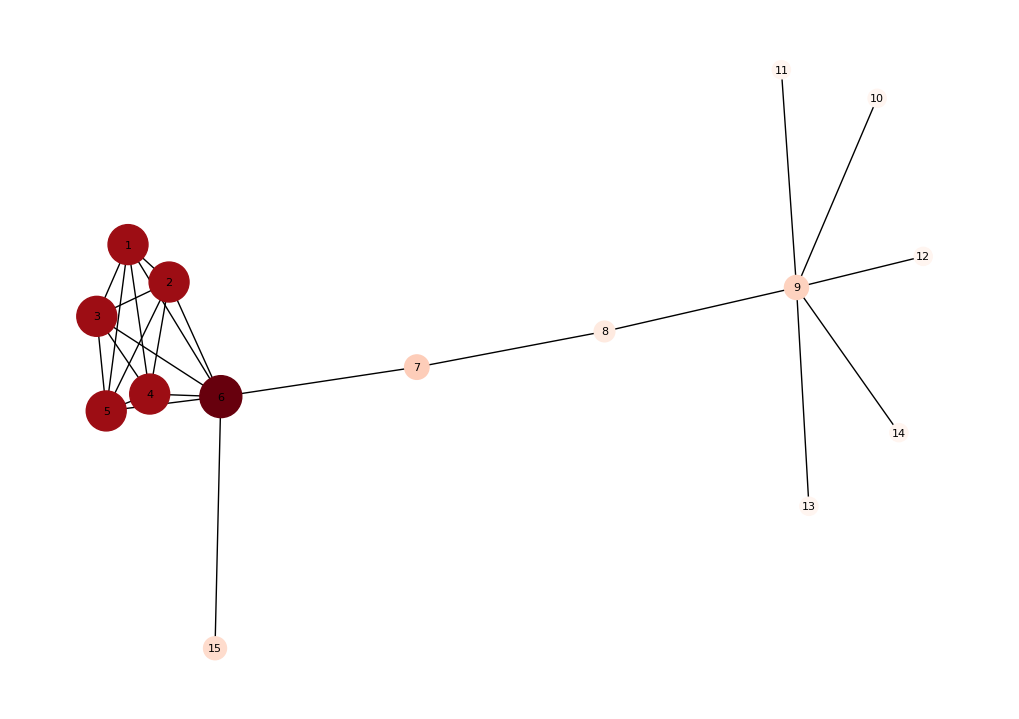

In [5]:
# arbitrary initial condition: 1/N-uniform vector of size N (initial condition does not matters)
z_0 = np.ones((N,1))/N

# set a tolerance to assess convergence to the limit
tol = 1e-5

# run the dynamics
z_old = z_0

while True:
    z_new = W.T @ z_old * (1-beta)/lambda_max + beta * mu
    if np.linalg.norm(z_new-z_old) < tol:
        break
    z_old=z_new

zk = z_new

# normalize the centrality
zk = zk/sum(zk)

print("Katz centrality: \n", zk)

plt.figure(1, figsize=(10,7))
# we draw the graph with same node position "pos" defined above
nx.draw(G,pos,
         with_labels=True,
         nodelist=list(G.nodes()), 
         # node size is proportional to centrality value
         node_size = zk*7000, 
         # node's color reflects centrality values (higher dc = darker color)
         node_color=zk,
         font_size=8,
         # node's colors are on the red scale
         cmap=plt.cm.Reds) 

## **B)** Write a distributed algorithm for the computation of Page-rank centrality, with $β = 0.15$ and uniform intrinsic centrality $µ$ .

Page-rank centrality: 
 [[0.07467521]
 [0.07467521]
 [0.07467521]
 [0.07467521]
 [0.07467521]
 [0.11444564]
 [0.0486121 ]
 [0.058152  ]
 [0.19405418]
 [0.03749236]
 [0.03749236]
 [0.03749236]
 [0.03749236]
 [0.03749236]
 [0.02389823]]


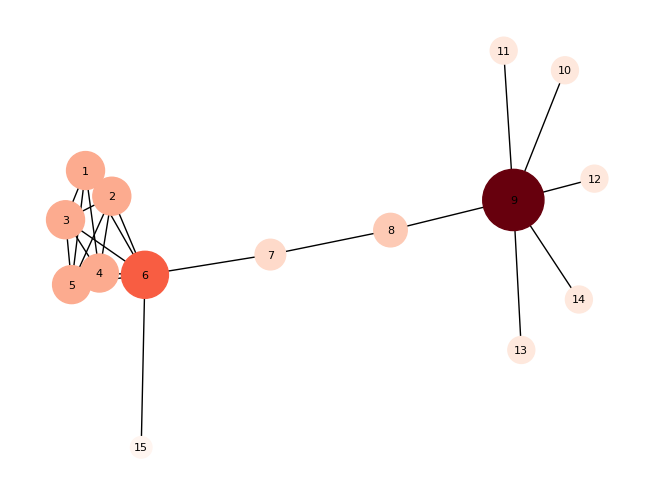

In [6]:
N = G.number_of_nodes() 
beta = 0.15
mu = np.ones((N,1))/N
# arbitrary initial condition: 1/N-uniform vector of size N (initial condition does not matters)
z_0 = np.zeros((N,1))

# set a tolerance to assess convergence to the limit
tol = 1e-5

# run the dynamics
z_old = z_0

while True:
    z_new = P.T @ z_old * (1-beta) + beta * mu
    if np.linalg.norm(z_new-z_old) < tol:
        break
    z_old=z_new

zb_distr = z_new

# normalize the centrality
zb_distr = zb_distr / sum(zb_distr)

print("Page-rank centrality: \n", zb_distr)
nx.draw(G,pos,
         with_labels=True,
         nodelist=list(G.nodes), 
         # node size is proportional to centrality value
         node_size = [d*10000 for d in zb_distr], 
         node_color=list(zb_distr),
         font_size=8,
         # node's colors are on the red scale
         cmap=plt.cm.Reds) 

plt.show()

## **C)** Explain the results of points **(A)** and **(B)**, focusing on the centralities of nodes $n_6$ and $n_9$.

In [7]:
nodes = [6, 9]
for n in nodes:
    print(f"Node {n}: Katz centrality = {zk[n-1][0]:.4f}, PageRank = {zb_distr[n-1][0]:.4f}")

Node 6: Katz centrality = 0.1301, PageRank = 0.1144
Node 9: Katz centrality = 0.0428, PageRank = 0.1941


explanations are  provided inside the report...

## **D)** Compute the Page-Rank centrality with uniform intrinsic centrality $\mu$ and for every $\beta \in \{0, 0.15, 0.25, 0.5, 0.75, 1\}$. Is the difference between the centrality of node $n_6$ and node $n_9$ monotone in $\beta$? Explain the results, focusing in particular on the extreme values of $\beta$.

β=0:  n6=0.145833   n9=0.125000
β=0.25:  n6=0.110606   n9=0.191116
β=0.5:  n6=0.101404   n9=0.166695
β=0.75:  n6=0.087507   n9=0.126978
β=1:  n6=0.066667   n9=0.066667


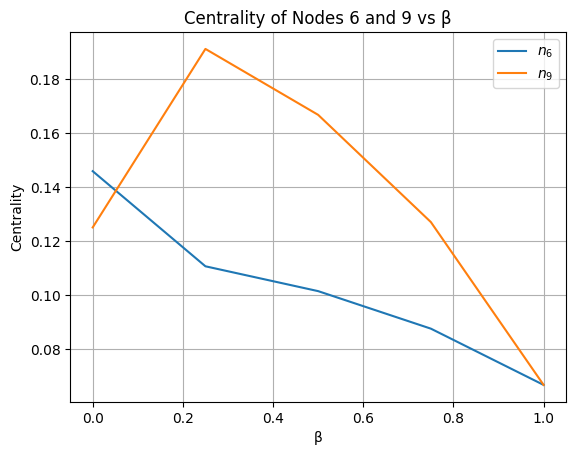

In [8]:
beta_values = [0,1/4,1/2,3/4,1]
mu = np.ones((N,1))/N
# arbitrary initial condition: 1/N-uniform vector of size N (initial condition does not matters)
z_0 = np.ones((N,1))

centrality_n6 = []
centrality_n9 = []


for beta in beta_values:
    z_old = z_0.copy()

    while True:
        z_new = P.T @ z_old * (1-beta) + beta * mu
        if np.linalg.norm(z_new - z_old) < tol:
            break
        z_old = z_new

    zb = z_new / np.sum(z_new)  # normalize
    
    # identify node indices (list(G.nodes()) is sorted)
    idx6 = list(G.nodes()).index(6)
    idx9 = list(G.nodes()).index(9)

    centrality_n6.append(zb[idx6].item())
    centrality_n9.append(zb[idx9].item())

    print(f"β={beta}:  n6={zb[idx6][0]:.6f}   n9={zb[idx9][0]:.6f}")

# plot ------------------------------------------------------------------
plt.figure()
plt.plot(beta_values, centrality_n6, label="$n_6$")
plt.plot(beta_values, centrality_n9, label="$n_9$")

plt.xlabel("β")
plt.ylabel("Centrality")

plt.title("Centrality of Nodes 6 and 9 vs β")
plt.grid(True)
plt.legend()
plt.show()